<a href="https://colab.research.google.com/github/yandihlg/rrnn/blob/main/p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import layers, models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# @title Texto de título predeterminado
data = pd.read_csv("/content/archivo.csv", header=None, names=['fecha', 'evento', 'centenas', 'decenas', 'unidades'])

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha']).map(pd.Timestamp.toordinal)

In [ ]:
le = LabelEncoder()
data['evento'] = le.fit_transform(data['evento'])

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['fecha', 'evento']])

In [ ]:
y = data['decenas']*10 + data['unidades']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Una sola unidad de salida porque estamos haciendo predicción numérica
])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
historial =model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
12814/12814 [==============================] - 28s 2ms/step - loss: 836.6132
Epoch 2/5
12814/12814 [==============================] - 28s 2ms/step - loss: 838.8445
Epoch 3/5
12814/12814 [==============================] - 28s 2ms/step - loss: 836.8516
Epoch 4/5
12814/12814 [==============================] - 29s 2ms/step - loss: 837.6622
Epoch 5/5
12814/12814 [==============================] - 27s 2ms/step - loss: 837.6555


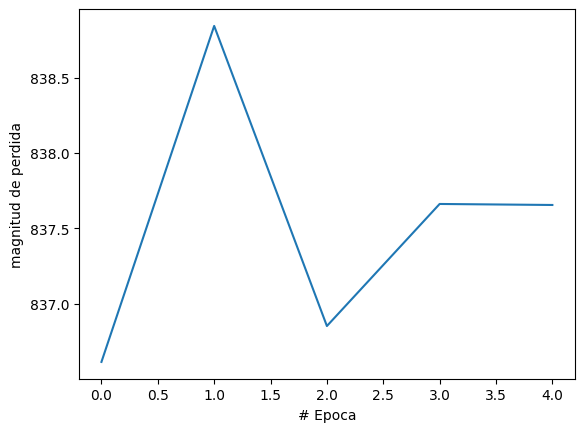

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
predictions = model.predict(X_test)

101/101 [==============================] - 1s 5ms/step


In [ ]:
for i, prediction in enumerate(predictions):
    print(f"Predicción {i+1}: {prediction[0]}")

Predicción 1: 54.46522521972656
Predicción 2: 54.00251007080078
Predicción 3: 55.06555938720703
Predicción 4: 54.0033073425293
Predicción 5: 54.9624137878418
Predicción 6: 54.35654067993164
Predicción 7: 54.18196487426758
Predicción 8: 53.901763916015625
Predicción 9: 54.10881042480469
Predicción 10: 53.623924255371094
Predicción 11: 54.166786193847656
Predicción 12: 53.45977783203125
Predicción 13: 53.00823974609375
Predicción 14: 53.271636962890625
Predicción 15: 54.545372009277344
Predicción 16: 54.53176498413086
Predicción 17: 54.87779998779297
Predicción 18: 53.581825256347656
Predicción 19: 54.43505096435547
Predicción 20: 54.62001037597656
Predicción 21: 53.58526611328125
Predicción 22: 54.72766876220703
Predicción 23: 54.663108825683594
Predicción 24: 54.54659652709961
Predicción 25: 54.76510238647461
Predicción 26: 53.84103012084961
Predicción 27: 53.3686637878418
Predicción 28: 53.66758728027344
Predicción 29: 53.996883392333984
Predicción 30: 54.02687072753906
Predicción 31: